In [1]:
require('cowplot')
library('ggplot2')
theme_set(theme_gray()) # switch to default ggplot2 theme for good
theme_update(panel.background = element_rect(fill = "grey95"))

Loading required package: cowplot
Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
realdata <- read.csv(file.path('..', 'zmeta_rocs', 'results', 'realdata_TPR.csv'), header=T, sep=",")

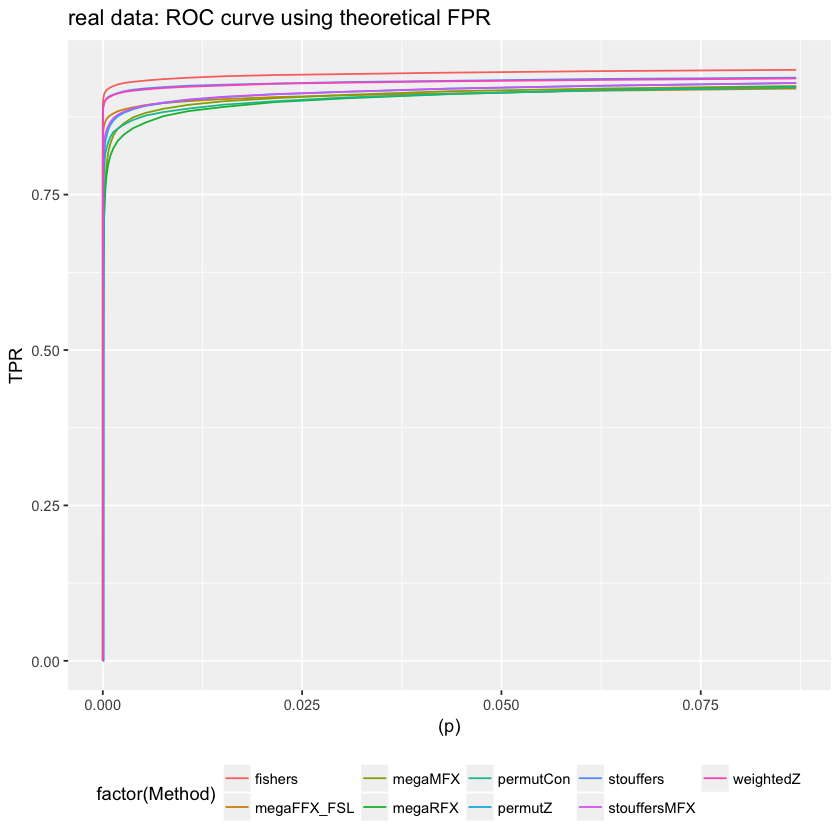

In [3]:
p <- ggplot(data=subset(realdata, p<0.1),aes(x=(p), y=TPR, group=Method, colour=factor(Method))) + 
geom_line() + ggtitle('real data: ROC curve using theoretical FPR') + theme(legend.position = 'bottom')

print(p)

In [4]:
simufpr <- read.csv(file.path('data', 'allsimudat_test1_k025_n20_nominal.csv'))

# Only looking at nominal data under some heterogeneity
simufpr <- subset(simufpr, Between==1 & unitMism=='nominal')

In [5]:
head(simufpr)

methods,glm,nStudies,nSubjects,Between,Within,nSubjectsSame,withinVariation,unitMism,soft2,⋯,rankP,expectedP,lnp,equivz,allgroups,expectedz,p_upper,z_upper,p_lower,z_lower
fishers,1,25,20,1,20,1,16,nominal,0,⋯,1,9.746589e-07,-49.52660,9.626282,1 20 25 20 1026000 16 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
fishers,1,25,20,1,20,1,16,nominal,0,⋯,2,1.949318e-06,-48.10786,9.479343,1 20 25 20 1026000 16 0 1 nominal,4.616714,2.360715e-07,5.037301,5.430440e-06,4.399284
fishers,1,25,20,1,20,1,16,nominal,0,⋯,3,2.923977e-06,-46.15251,9.273095,1 20 25 20 1026000 16 0 1 nominal,4.531813,6.029947e-07,4.854651,7.041588e-06,4.342560
fishers,1,25,20,1,20,1,16,nominal,0,⋯,4,3.898635e-06,-45.07518,9.157519,1 20 25 20 1026000 16 0 1 nominal,4.470676,1.062248e-06,4.741206,8.545076e-06,4.299866
fishers,1,25,20,1,20,1,16,nominal,0,⋯,5,4.873294e-06,-43.65503,9.002951,1 20 25 20 1026000 16 0 1 nominal,4.422720,1.582347e-06,4.659831,9.982025e-06,4.265292
fishers,1,25,20,1,20,1,16,nominal,0,⋯,6,5.847953e-06,-43.44453,8.979819,1 20 25 20 1026000 16 0 1 nominal,4.383181,2.146099e-06,4.596707,1.137261e-05,4.236084


In [6]:
realdata_withsimuFPR = data.frame()

for (variation in unique(simufpr$withinVariation)){
#     print(variation)
    currdat <- realdata
    currdat$withinVariation <- variation
    currdat$Between <- 1
    currdat$Within <- 20
    currdat$FPR <- NA

    methods <- levels(realdata$Method)
    length(methods)
    
    for (meth in methods){
#         print(paste('Currently: ', meth))
        th_p = currdat[currdat$Method==meth,]$p
       
        sub_df = subset(simufpr, Between==1 & Within==20 & withinVariation==variation & methods == meth)
        
        approximated = approx(x=sub_df$P, y=sub_df$expectedP, xout=th_p, yleft=0)
#         plot(sub_df$P, sub_df$expectedP, main = "approx")
#         points(approximated, col = 2, pch = "*")
        currdat[currdat$Method==meth,]$FPR <- approximated$y
        currdat[currdat$p==1,]$FPR <- 1

    }
    
#     currdat[currdat$p==0,]$FPR <- 0
#     print(currdat[currdat$p==0,]$FPR) 

    realdata_withsimuFPR <- rbind(realdata_withsimuFPR, currdat)
}

for (within in unique(simufpr$Within)){
    currdat <- realdata
    currdat$withinVariation <- 1
    currdat$Between <- 1
    currdat$Within <- within
    currdat$FPR <- NA

    methods <- levels(realdata$Method)
    length(methods)
    
    for (meth in methods){
#         print(paste('Currently: ', meth))
        th_p = currdat[currdat$Method==meth,]$p
       
        sub_df = subset(simufpr, Between==1 & Within==within & withinVariation==1 & methods == meth)
        
        approximated = approx(x=sub_df$P, y=sub_df$expectedP, xout=th_p, yleft=0)
#         plot(sub_df$P, sub_df$expectedP, main = "approx")
#         points(approximated, col = 2, pch = "*")
         currdat[currdat$Method==meth,]$FPR <- approximated$y

    }
    
    currdat[currdat$p==1,]$FPR <- 1
#     print(currdat[currdat$p==0,]$FPR) 

    realdata_withsimuFPR <- rbind(realdata_withsimuFPR, currdat)
}

# simufpr_homo <- subset(simufpr, withinVariation==1 & Between==1 & Within==20)

# simufpr_out16 <- subset(simufpr, withinVariation==16 & Between==1) 
# names(simufpr_out16)

# print(levels(simufpr_out16$methods))
# print('--')
# print(levels(realdata$Method))



In [7]:
tail(realdata_withsimuFPR[is.na(realdata_withsimuFPR$FPR),])

Method,p,TPR,withinVariation,Between,Within,FPR


In [8]:
unique(simufpr$Within)

[1] 20 80 40 10  5

In [9]:
head(subset(realdata_withsimuFPR, Method=='permutCon'))

,Method,p,TPR,withinVariation,Between,Within,FPR
708,permutCon,0.000000e+00,0,16,1,20,0
709,permutCon,1.000000e-15,0,16,1,20,0
710,permutCon,1.417474e-15,0,16,1,20,0
711,permutCon,2.009233e-15,0,16,1,20,0
712,permutCon,2.848036e-15,0,16,1,20,0
713,permutCon,4.037017e-15,0,16,1,20,0


In [10]:
realdata_withsimuFPR$heterogeneity <- realdata_withsimuFPR$Between/realdata_withsimuFPR$Within*20

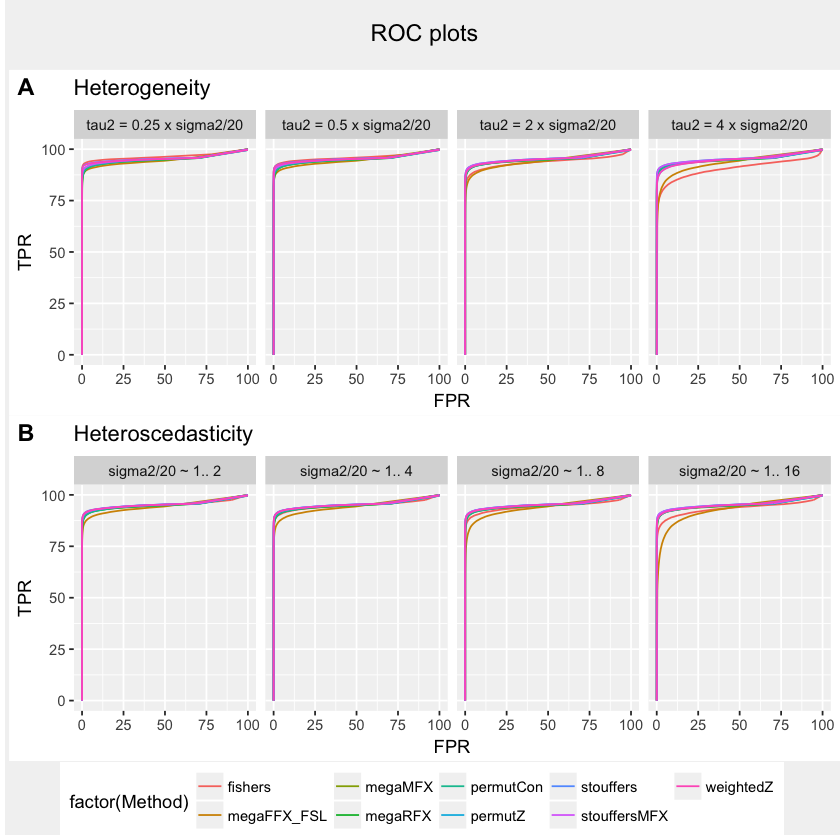

In [60]:
heterogeneity_labels <- function(value) {
    value <- paste("tau2 =", value, 'x sigma2/20')
    value
}

heteroscedasticity_labels <- function(value) {
    value <- paste("sigma2/20 ~ 1..", value)
    value
}

method_labels <- function(string) {
    string[string=="megaMFX"] <- "MFX"
    string[string=="megaRFX"] <- "RFX"
    string[string=="permutCon"] <- "Perm. E"
    string[string=="permutZ"] <- "Perm. Z"
    string[string=="stouffers"] <- "Stouffer's"
    string[string=="fishers"] <- "Fisher's"
    string[string=="fishers"] <- "Fisher's"
    string[string=="weightedZ"] <- "Weighted Z"
    string[string=="megaFFX_FSL"] <- "FFX"
    string
}

roc_plot <- function(data, aes_line) {
# print(names(data))
# print(("p" %in% names(data)))
    if ("p" %in% names(data)){
        data$p <- data$p*100
    } 

#     print("FPR" %in% names(data))
    
    if ("FPR" %in% names(data)){
        data$FPR <- data$FPR*100
    } 
    
    data$TPR <- data$TPR*100
    
    p <- ggplot(data=data,aes(group=Method, colour=factor(Method))) + 
    geom_line(aes_line) 
#     + coord_cartesian(xlim = c(0, 10), ylim = c(80, 95)) 
    return(p)
}
    

roc_plots <- function(data){
              
#     # Panel A: Against theoretical FPR
#     p1 <- roc_plot(subset(realdata, p<0.1 & TPR>0.8), aes(x=p, y=TPR)) + 
#             theme(legend.position="bottom", legend.direction='vertical') + coord_fixed(ratio = 1)
    
#     # Panel B: Against simulated FPR & under varying levels of heterogenerity
#     p1 <- roc_plot(subset(realdata_withsimuFPR, withinVariation==1 & Within==20), aes(x=FPR, y=TPR)) + 
#             facet_grid(.~heterogeneity, labeller = labeller(withinVariation = group_var_labels)) + ggtitle('Homo') + theme(legend.position="none") +
#             theme(legend.position="bottom", legend.direction='vertical')
    
    # Panel B: Against simulated FPR & under varying levels of heterogenerity
    p2 <- roc_plot(subset(realdata_withsimuFPR, withinVariation==1 & Within!=20), aes(x=FPR, y=TPR)) + 
            facet_grid(.~heterogeneity, labeller = labeller(heterogeneity = heterogeneity_labels,
                           withinVariation = heteroscedasticity_labels)) + ggtitle('Heterogeneity') + theme(legend.position="none") 
#     p2 <- ggplot(data=subset(realdata_withsimuFPR, FPR<=0.10 & TPR>0.75 & withinVariation==1),
#             aes(x=FPR, y=TPR, group=Method, colour=factor(Method))) + geom_point(size=0.02) + geom_line() + 
            

    # Panel C: Against simulated FPR & under heteroscedasticity
    p3 <- roc_plot(subset(realdata_withsimuFPR, withinVariation>1), aes(x=FPR, y=TPR)) + 
            facet_grid(.~withinVariation, labeller = labeller(heterogeneity = heterogeneity_labels,
                           withinVariation = heteroscedasticity_labels)) + ggtitle('Heteroscedasticity') + theme(legend.position="none")

#     ggplot(data=subset(realdata_withsimuFPR, FPR<=0.10 & TPR>0.75 & withinVariation>1),
#             aes(x=FPR, y=TPR, group=Method, colour=factor(Method))) + 
#     geom_point(size=0.02) + geom_line() + 

    
    # Organise the figure: title, panel A at the top, panel B and C in a second row
#     right_column <- plot_grid(p1, labels = 'A', ncol=1)
   
    
    left_column <- plot_grid(p2, p3, labels = c('A', 'B'), ncol=1)
    
#     p <- plot_grid(right_column, left_column, labels = ' ', ncol=2, rel_widths=c(1, 3))
    title <- ggdraw() + draw_label('ROC plots')
    legend <- get_legend(p3 + theme(legend.position="bottom"))
#     p <- plot_grid(p, legend, ncol = 1, rel_heights = c(1, .2))
    
    p <- plot_grid(title, left_column, legend, ncol=1, rel_heights=c(0.1, 1, 0.1)) + 
        theme(plot.title=element_text(size=12), text=element_text(size=10))

    return(p)
}

p <- roc_plots(realdata)

# print on screen
print(p)

In [26]:
library('pROC')
data(aSAH)

print(head(aSAH))

# Syntax (response, predictor):
auc(aSAH$outcome, aSAH$s100b)

# With a roc object:
rocobj <- roc(aSAH$outcome, aSAH$s100b)
# Full AUC:
auc(rocobj)
# Partial AUC:
auc(rocobj, partial.auc=c(1, .8), partial.auc.focus="se", partial.auc.correct=TRUE)

# Alternatively, you can get the AUC directly from roc():
roc(aSAH$outcome, aSAH$s100b)$auc
roc(aSAH$outcome, aSAH$s100b,
    partial.auc=c(1, .8), partial.auc.focus="se",
    partial.auc.correct=TRUE)$auc

   gos6 outcome gender age wfns s100b  ndka
29    5    Good Female  42    1  0.13  3.01
30    5    Good Female  37    1  0.14  8.54
31    5    Good Female  42    1  0.10  8.09
32    5    Good Female  27    1  0.04 10.42
33    1    Poor Female  42    3  0.13 17.40
34    1    Poor   Male  48    2  0.10 12.75


Area under the curve: 0.7314

Area under the curve: 0.7314

Corrected partial area under the curve (sensitivity 1-0.8): 0.5801

Area under the curve: 0.7314

Corrected partial area under the curve (sensitivity 1-0.8): 0.5801

In [55]:
simple_auc <- function(sens, spec){
#     print(order(sens, spec))
    
    height = (sens[-1]+sens[-length(sens)])/2
    width = -diff(spec) # = diff(rev(omspec))
    sum(height*width)
}

In [56]:
my_dat <- (subset(realdata_withsimuFPR, Method=='megaRFX' & withinVariation==16))
simple_auc(my_dat$TPR, 1-my_dat$FPR)

[1] 0.951057

In [80]:
auc_df <- data.frame()

for (within in unique(realdata_withsimuFPR$Within)){
    for (variation in unique(realdata_withsimuFPR$withinVariation)){

        methods <- levels(realdata_withsimuFPR$Method)

        for (meth in methods){

            sub_df = subset(realdata_withsimuFPR, Between==1 & Within==within & withinVariation==variation & Method == meth)
    #         print(length(sub_df$TPR))
    #         print(unique(sub_df$Method))
            auc_value = simple_auc(sub_df$TPR, 1-sub_df$FPR)
            auc_df <- rbind(auc_df, data.frame(withinVariation = variation, 
                                               Within = within,
                                              Between=1,
                                              auc=auc_value,
                                              methods=meth))

    }
    }
}

In [36]:
length()

[1] 9090

In [12]:
head(subset(simufpr, methods=='fishers' & withinVariation==1 & Within==5)[
    ,!(colnames(simufpr) %in% c("nSubjectsSame", "soft2", "soft2Factor", "nSimu", "unitMism", "nSubjects", "nStudies"))])

,methods,glm,Between,Within,withinVariation,minuslog10P,P,rankP,expectedP,lnp,equivz,allgroups,expectedz,p_upper,z_upper,p_lower,z_lower
23833,fishers,1,1,5,1,28.65412,2.217579e-29,1,9.746589e-07,-65.97855,11.19255,1 5 25 20 1026000 1 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
23834,fishers,1,1,5,1,28.02721,9.392599e-29,2,1.949318e-06,-64.53504,11.06385,1 5 25 20 1026000 1 0 1 nominal,4.616714,2.360715e-07,5.037301,5.430440e-06,4.399284
23835,fishers,1,1,5,1,27.65100,2.233578e-28,3,2.923977e-06,-63.66878,10.98591,1 5 25 20 1026000 1 0 1 nominal,4.531813,6.029947e-07,4.854651,7.041588e-06,4.342560
23836,fishers,1,1,5,1,26.48500,3.273431e-27,4,3.898635e-06,-60.98397,10.74081,1 5 25 20 1026000 1 0 1 nominal,4.470676,1.062248e-06,4.741206,8.545076e-06,4.299866
23837,fishers,1,1,5,1,26.31749,4.814021e-27,5,4.873294e-06,-60.59826,10.70514,1 5 25 20 1026000 1 0 1 nominal,4.422720,1.582347e-06,4.659831,9.982025e-06,4.265292
23838,fishers,1,1,5,1,26.22360,5.975872e-27,6,5.847953e-06,-60.38207,10.68510,1 5 25 20 1026000 1 0 1 nominal,4.383181,2.146099e-06,4.596707,1.137261e-05,4.236084


In [13]:
head(subset(realdata_withsimuFPR, Method=='fishers' & Within==0.25*20))

,Method,p,TPR,withinVariation,Between,Within,FPR,heterogeneity
8182,fishers,0.000000e+00,0.0000000,1,1,5,0.000000000,4
8183,fishers,1.000000e-15,0.6958975,1,1,5,0.003723689,4
8184,fishers,1.417474e-15,0.6987952,1,1,5,0.004005578,4
8185,fishers,2.009233e-15,0.7029129,1,1,5,0.004349295,4
8186,fishers,2.848036e-15,0.7068781,1,1,5,0.004746643,4
8187,fishers,4.037017e-15,0.7111992,1,1,5,0.005126801,4
